  Predict Restaurant Ratings
---
 Objective: Build a machine learning model to predict the
 aggregate rating of a restaurant based on other features.
 ---
 Steps:
 Preprocess the dataset by handling missing values,
 encoding categorical variables, and splitting the data
 into training and testing sets.
 Select a regression algorithm (e.g., linear regression,
 decision tree regression) and train it on the training data.
 Evaluate the model's performance using appropriate
 regression metrics (e.g., mean squared error, R-squared)
 on the testing data.
 Interpret the model's results and analyze the most
 influential features affecting restaurant ratings.


In [23]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report
     

In [24]:
# load dataframe
df = pd.read_csv('restaurant.csv', encoding='ISO-8859-1')

In [25]:
df.head()

,ï»¿Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Data Preprocessing and Splitting

In [26]:
# check for null values
df.isna().sum()
     

ï»¿Restaurant ID        0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [27]:
# remove null value rows
df= df.dropna()
     
df.isna().sum()

ï»¿Restaurant ID        0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [28]:
df.shape

(9542, 21)

In [29]:
# drop features that inhibit model building
columns_to_drop = ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [30]:
print(df.describe())

       ï»¿Restaurant ID  Average Cost for two  Price range  Aggregate rating  \
count      9.542000e+03           9542.000000  9542.000000       9542.000000   
mean       9.043301e+06           1200.326137     1.804968          2.665238   
std        8.791967e+06          16128.743876     0.905563          1.516588   
min        5.300000e+01              0.000000     1.000000          0.000000   
25%        3.019312e+05            250.000000     1.000000          2.500000   
50%        6.002726e+06            400.000000     2.000000          3.200000   
75%        1.835260e+07            700.000000     2.000000          3.700000   
max        1.850065e+07         800000.000000     4.000000          4.900000   

              Votes  
count   9542.000000  
mean     156.772060  
std      430.203324  
min        0.000000  
25%        5.000000  
50%       31.000000  
75%      130.000000  
max    10934.000000  


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ï»¿Restaurant ID      9542 non-null   int64  
 1   Average Cost for two  9542 non-null   int64  
 2   Has Table booking     9542 non-null   object 
 3   Has Online delivery   9542 non-null   object 
 4   Is delivering now     9542 non-null   object 
 5   Switch to order menu  9542 non-null   object 
 6   Price range           9542 non-null   int64  
 7   Aggregate rating      9542 non-null   float64
 8   Rating color          9542 non-null   object 
 9   Rating text           9542 non-null   object 
 10  Votes                 9542 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 894.6+ KB


In [32]:
# encode the yes-no labels of categorical features into binary (1 for yes and 0 for no)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Has Table booking'] = le.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = le.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = le.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = le.fit_transform(df['Switch to order menu'])
df['Rating color'] = le.fit_transform(df['Rating color'])
df['Rating text'] = le.fit_transform(df['Rating text'])

In [33]:
df

,ï»¿Restaurant ID,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,1100,1,0,0,0,3,4.8,0,1,314
1,6304287,1200,1,0,0,0,3,4.5,0,1,591
2,6300002,4000,1,0,0,0,4,4.4,1,5,270
3,6318506,1500,0,0,0,0,4,4.9,0,1,365
4,6314302,1500,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,80,0,0,0,0,3,4.1,1,5,788
9547,5908749,105,0,0,0,0,3,4.2,1,5,1034
9548,5915807,170,0,0,0,0,4,3.7,5,2,661
9549,5916112,120,0,0,0,0,4,4.0,1,5,901


In [34]:
df.shape

(9542, 11)

<Axes: ylabel='count'>

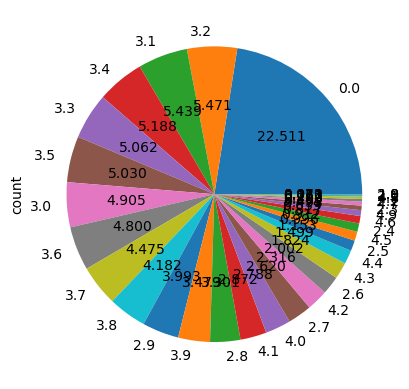

In [35]:
df['Aggregate rating'].value_counts().plot(kind='pie', autopct = '%.3f')


C:\Users\Simran Taj\AppData\Local\Temp\ipykernel_23288\3281755064.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Aggregate rating'])


<Axes: xlabel='Aggregate rating', ylabel='Density'>

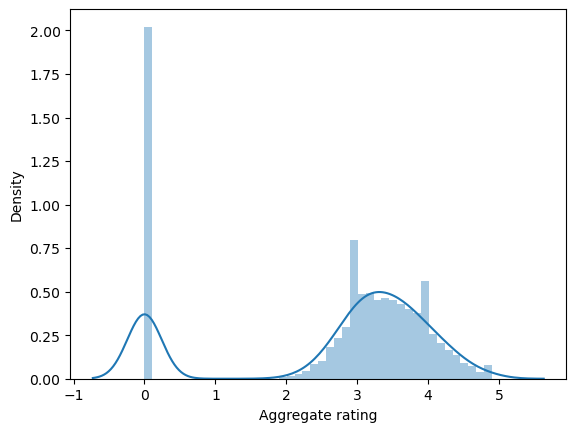

In [36]:
sns.distplot(df['Aggregate rating'])


<Axes: xlabel='Aggregate rating', ylabel='Votes'>

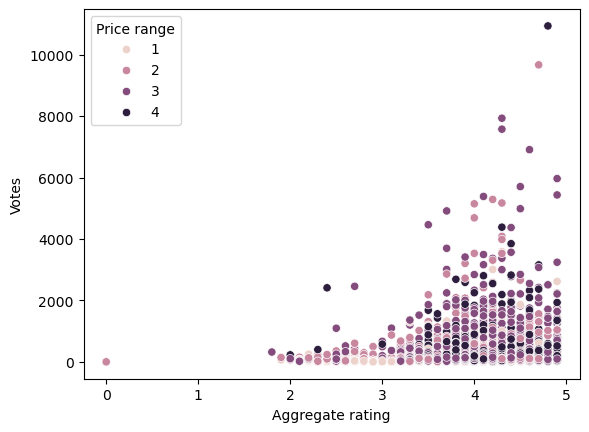

In [37]:
sns.scatterplot(x=df["Aggregate rating"],y=df["Votes"],hue=df["Price range"])


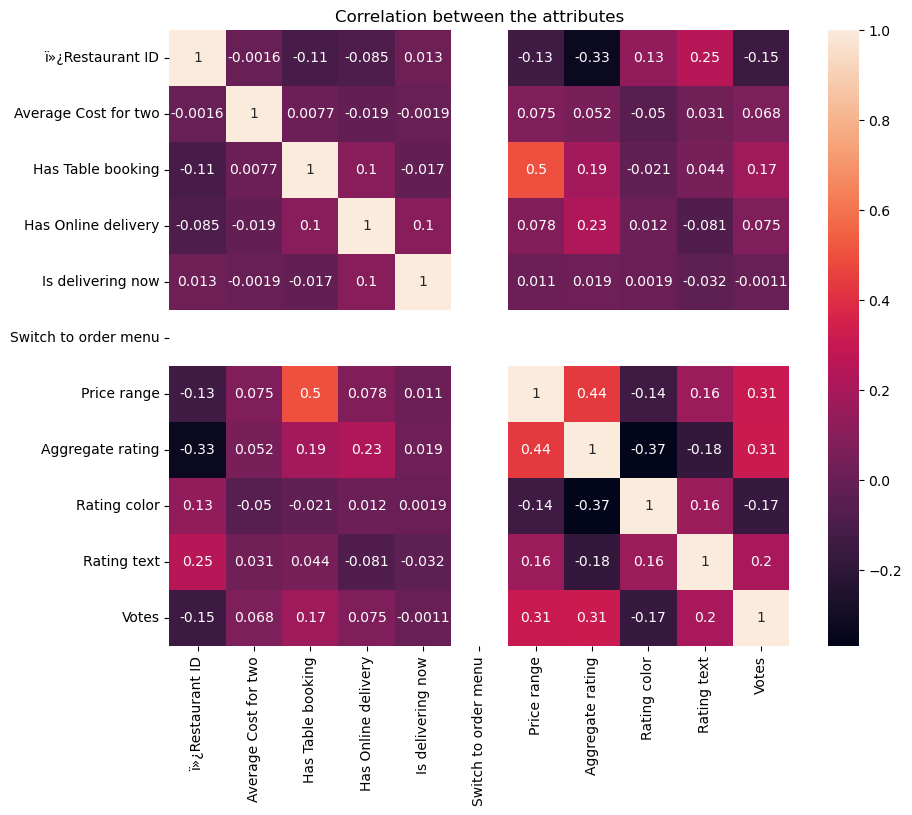

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between the attributes")
plt.show()

In [39]:
x = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [40]:
# data splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=250)
x_train.head()
y_train.head()
     

5883    3.8
5470    3.2
5790    0.0
5588    0.0
9283    4.1
Name: Aggregate rating, dtype: float64

In [41]:
print("x_train: ", x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)
     

x_train:  (7633, 10)
x_test:  (1909, 10)
y_train:  (7633,)
y_test:  (1909,)


Running the Linear Regression Model


In [42]:
#training by linear regression algorithm
linreg = LinearRegression()
linreg.fit(x_train,y_train)
linreg_pred=linreg.predict(x_test)

Running the Decision Tree


In [43]:
# training by decision tree regressor algorithm
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)

In [44]:
#evaluating performance metrics of decision tree
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_mse = mean_squared_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)
print(f"MAE of the decision tree model is: {dtree_mae:.2f}")
print(f"MSE of the decision tree model is: {dtree_mse:.2f}")
print(f"R2 score of the decision tree model is: {dtree_r2:.2f}")

MAE of the decision tree model is: 0.14
MSE of the decision tree model is: 0.05
R2 score of the decision tree model is: 0.98


Model achieves 98% accuracy
---
MSE of 0.05 indicates that model's predictions are very accurate & low errors.
R2 value of 0.98 suggests that model is highly effective at explaining & predicting the target variable.
Decision Tree Regressor model is performing exceptionally well on the test data.

Analysing the factors affecting restaurant ratings
---
Distribution of the target variable ("Aggregate rating") is well balanced.
Expensive restaurants (higher price range) tend to have higher ratings.